In [1]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [4]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [5]:
import pandas as pd
df.method = pd.Categorical(df.method)
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [6]:
df.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [7]:
df.shape

(1035, 6)

In [8]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [9]:
df.describe().T # kategorik degiskenler yok

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [10]:
df.describe(include = 'all') # kategorik degiskenleri eklemek icin include

,method,number,orbital_period,mass,distance,year
count,1035,1035.000000,992.000000,513.000000,808.000000,1035.000000
unique,10,NaN,NaN,NaN,NaN,NaN
top,Radial Velocity,NaN,NaN,NaN,NaN,NaN
freq,553,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,NaN,1.240976,26014.728304,3.818617,733.116493,3.972567
min,NaN,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,NaN,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,NaN,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,NaN,2.000000,526.005000,3.040000,178.500000,2012.000000


In [11]:
df.nunique()

method             10
number              7
orbital_period    988
mass              381
distance          552
year               23
dtype: int64

In [12]:
df.isnull().values.any() # eksik veri var mi 

True

In [13]:
df.isnull().sum() # kacar tane eksik deger oldugu

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [14]:
df['orbital_period'].fillna(0, inplace = True) # eksik verileri 0 ile doldurma

In [15]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [16]:
import numpy as np
df['mass'].fillna(np.mean(df.mass), inplace = True) # eksik verileri ortalama ile doldurma

In [17]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

## Kategorik Degisken Ozetleri

In [18]:
kat_df = df.select_dtypes(include = ['category'])

In [19]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [20]:
kat_df.method.unique() # isimleri

[Radial Velocity, Imaging, Eclipse Timing Variations, Transit, Astrometry, Transit Timing Variations, Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]
Categories (10, object): [Radial Velocity, Imaging, Eclipse Timing Variations, Transit, ..., Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]

In [21]:
kat_df['method'].value_counts().count() # kacar tane oldugu

10

In [22]:
kat_df['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

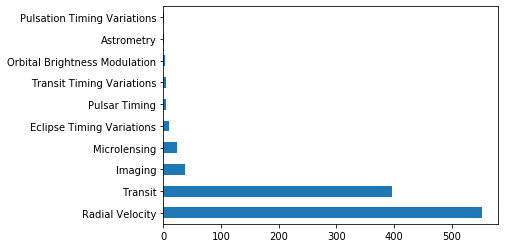

In [23]:
df['method'].value_counts().plot.barh()

In [24]:
from pandas.api.types import CategoricalDtype # nominal(sayi) katgorik degiskenden ordinale(rutbe) cevirmek icin yapiyoruz

In [25]:
kat_df = kat_df.astype(CategoricalDtype(ordered = True))

In [26]:
kat_df.method.head()

0    Radial Velocity
1    Radial Velocity
2    Radial Velocity
3    Radial Velocity
4    Radial Velocity
Name: method, dtype: category
Categories (10, object): [Astrometry < Eclipse Timing Variations < Imaging < Microlensing ... Pulsation Timing Variations < Radial Velocity < Transit < Transit Timing Variations]

## Surekli Degisken Ozetleri

In [27]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [28]:
df_num = df.select_dtypes(include = ['float64','int64'])

In [29]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [30]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.0000,1.000000,1.000000,2.000000,7.0
orbital_period,1035.0,1919.704595,25471.198309,0.0000,4.461268,31.884000,487.100000,730000.0
mass,1035.0,2.638161,2.687081,0.0036,1.285000,2.638161,2.638161,25.0
distance,808.0,264.069282,733.116493,1.3500,32.560000,55.250000,178.500000,8500.0
year,1035.0,2009.070531,3.972567,1989.0000,2007.000000,2010.000000,2012.000000,2014.0


In [31]:
df_num['mass'].describe()

count    1035.000000
mean        2.638161
std         2.687081
min         0.003600
25%         1.285000
50%         2.638161
75%         2.638161
max        25.000000
Name: mass, dtype: float64

In [32]:
print("Ortalama: " + str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: " + str(df_num["distance"].count())) 
print("Maksimum Değer: " + str(df_num["distance"].max()))
print("Minimum Değer: " + str(df_num["distance"].min()))
print("Medyan: " + str(df_num["distance"].median()))
print("Standart Sapma: " + str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404421


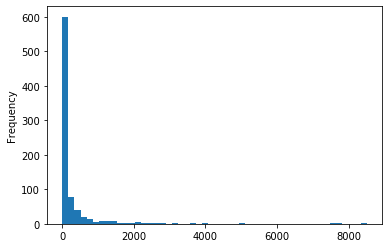

In [33]:
df['distance'].plot.hist(bins=50)

 # Dagilim

Diamonds veri seti:

price: dolar cinsinden fiyat ($326 $18,823)

carat: ağırlık (0.2–5.01)

cut: kalite (Fair, Good, Very Good, Premium, Ideal)

color: renk (from J (worst) to D (best))

clarity: temizliği, berraklığı 
    (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0–10.74)

y: width in mm (0–58.9)

z: depth in mm (0–31.8)

depth: toplam derinlik yuzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

table: width of top of diamond relative to widest point (43–95)

In [34]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [35]:
df.shape

(53940, 10)

In [36]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [38]:
from pandas.api.types import CategoricalDtype

In [39]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))
df.color = df.color.astype(CategoricalDtype(ordered = True))
df.clarity = df.clarity.astype(CategoricalDtype(ordered = True))

In [40]:
df.cut.head(1)
#kalite (Fair, Good, Very Good, Premium, Ideal)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [41]:
df.color.head(1)
#renk (from J (worst) to D (best))

0    E
Name: color, dtype: category
Categories (7, object): [D < E < F < G < H < I < J]

In [42]:
df.clarity.head(1)
#clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

0    SI2
Name: clarity, dtype: category
Categories (8, object): [I1 < IF < SI1 < SI2 < VS1 < VS2 < VVS1 < VVS2]

In [43]:
# yukaridaki 3 degiskeni de kafasina gore degistirmis 

In [44]:
cut_kategoriler = ['Fair','Good','Very Good','Premium','Ideal']

In [45]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler,ordered = True))

In [46]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [47]:
# kategorik degiskenler !!!! bar plot !!!! ile gorsellestirilir

## Barplot

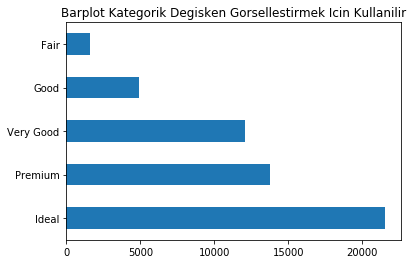

In [48]:
(df['cut']
 .value_counts()
 .plot.barh()
 .set_title('Barplot Kategorik Degisken Gorsellestirmek Icin Kullanilir'));

In [49]:
color_kategoriler = ['J','I','H','G','F','E','D']

In [50]:
df_color = df.color.astype(CategoricalDtype(categories = color_kategoriler,ordered = True))

In [51]:
df_color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): [J < I < H < G < F < E < D]

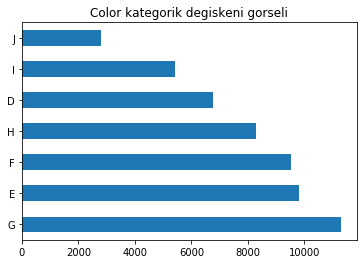

In [52]:
(df['color']
.value_counts()
.plot.barh()
.set_title('Color kategorik degiskeni gorseli'));

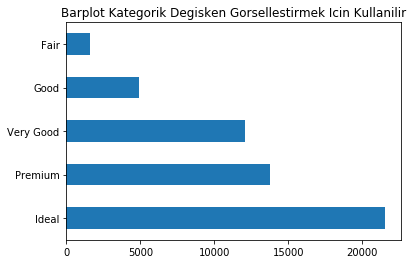

In [53]:
(df['cut']
 .value_counts()
 .plot.barh()
 .set_title('Barplot Kategorik Degisken Gorsellestirmek Icin Kullanilir'));

In [54]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


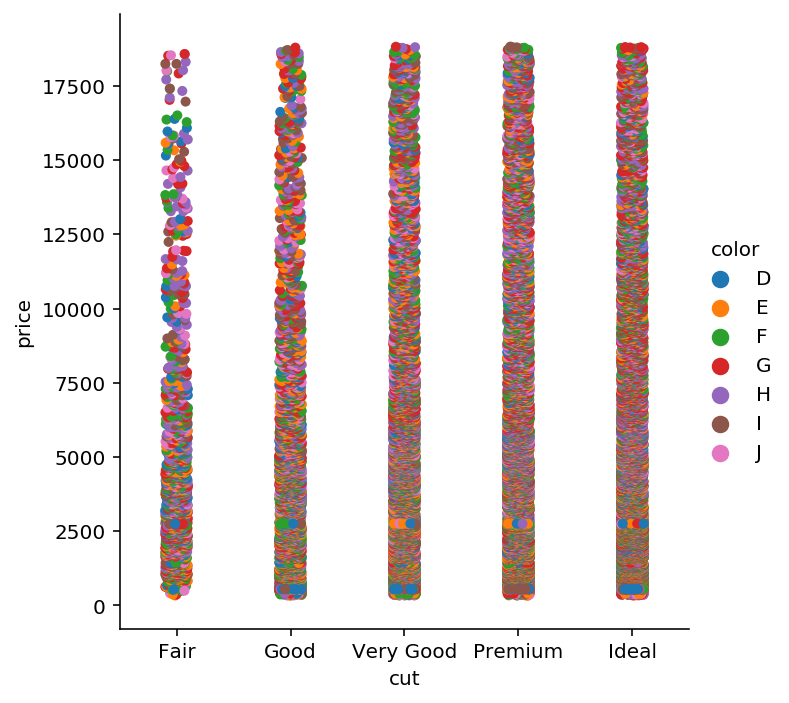

In [55]:
%config InlineBackend.figure_format = 'retina'
sns.catplot(x = 'cut', y = 'price',hue = 'color', data = df);

## Dagilim - Histogram ve Yogunluk

In [56]:
# surekli degiskenleri gorsellestirmek icin kullanilir. Bir onceki barplot kategorik degiskendi

In [57]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


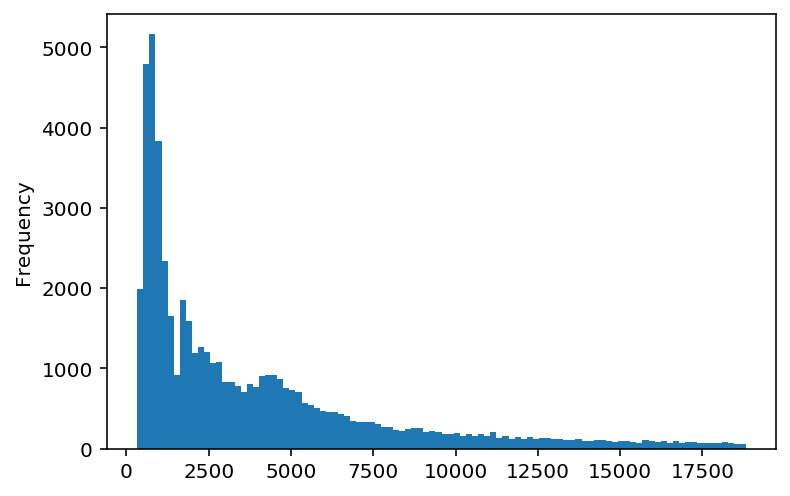

In [59]:
(df['price']
.plot
.hist(bins=100));

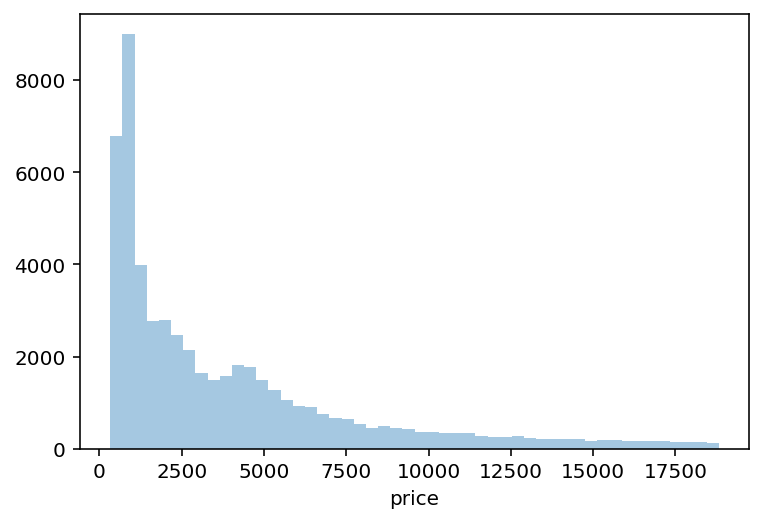

In [66]:
sns.distplot(df.price, kde= False); # yukaridaki grafigin aynisi

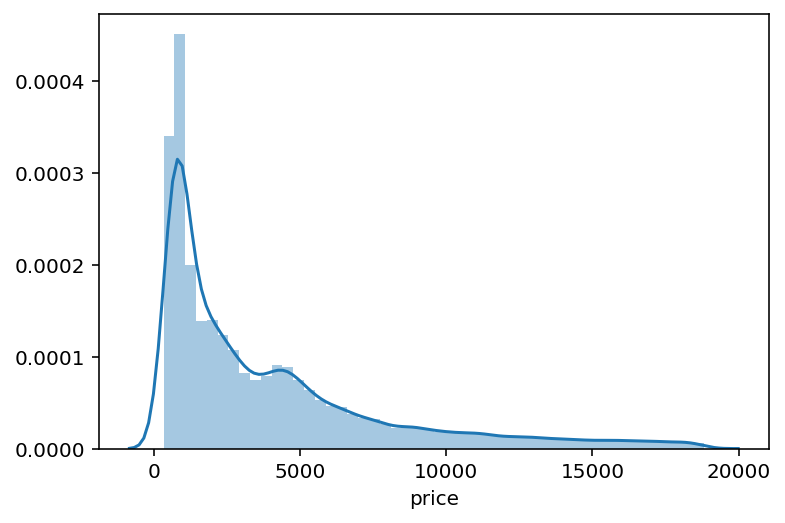

In [62]:
sns.distplot(df.price); # Histogram ve yogunluk grafigi icin

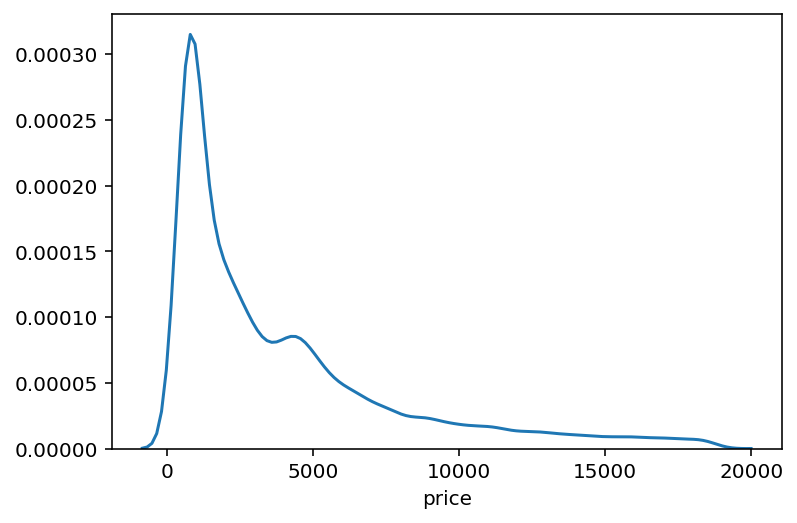

In [63]:
sns.distplot(df.price,hist=False); # sadece yogunluk grafigi

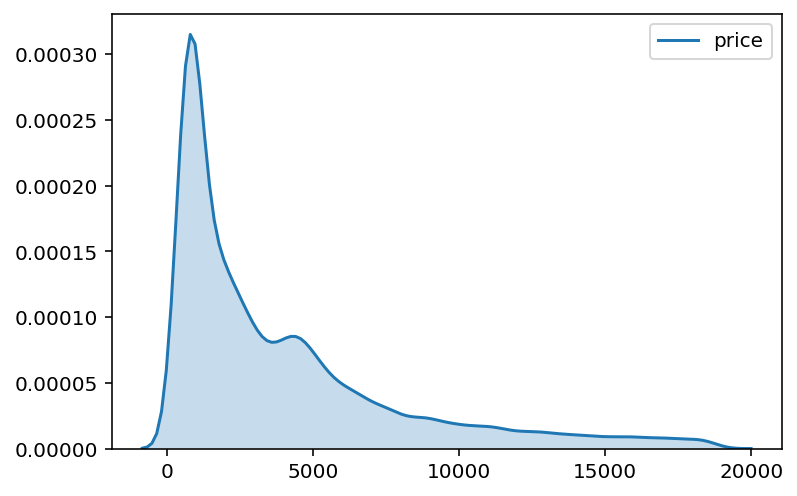

In [64]:
sns.kdeplot(df.price,shade=True); # alti dolu olarak yogunluk grafigi

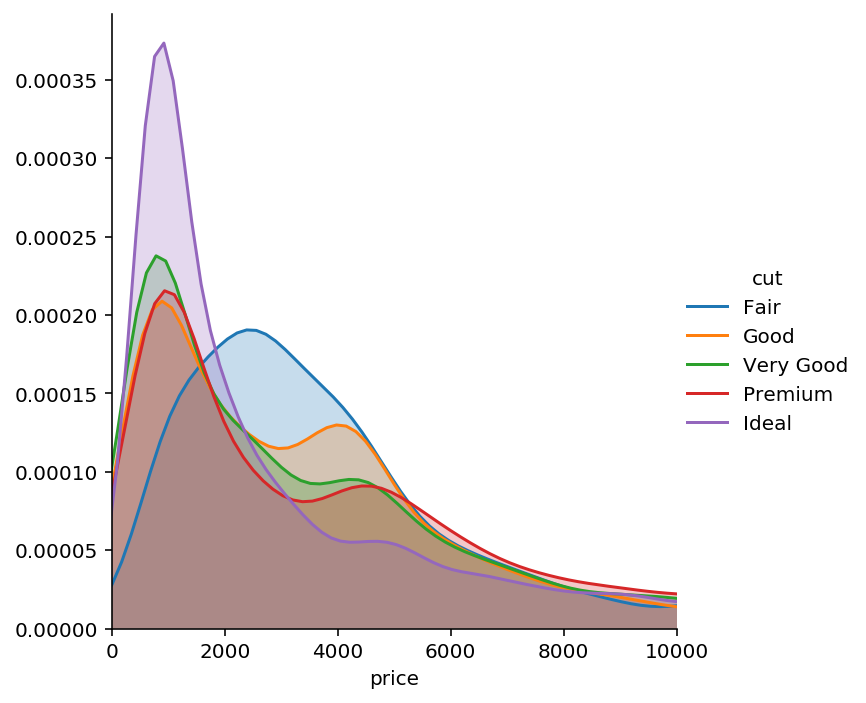

In [68]:
(sns
.FacetGrid(df,
           hue='cut',
           height =5,
           xlim = (0,10000))
.map(sns.kdeplot,'price',shade = True)
.add_legend());

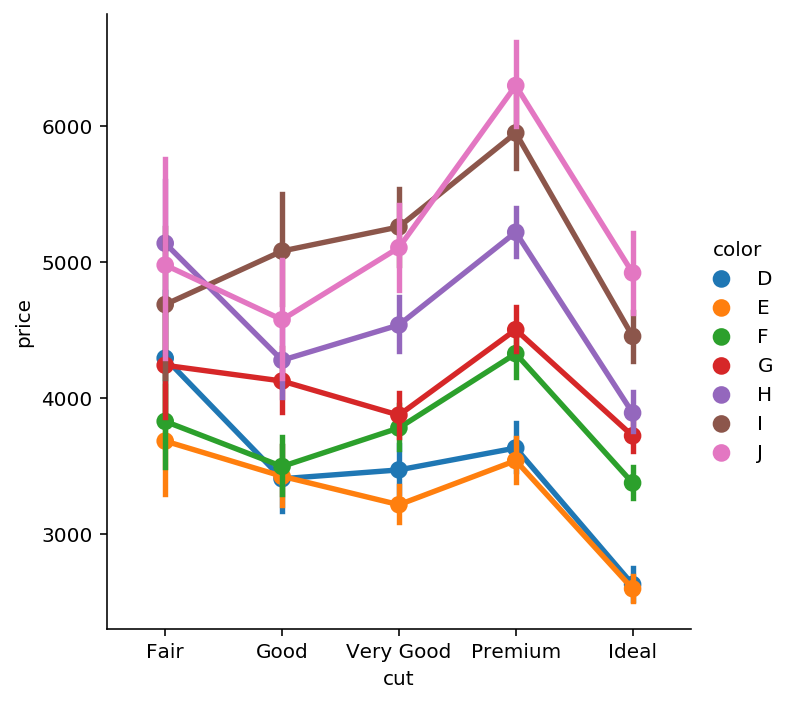

In [69]:
sns.catplot(x='cut',y='price',hue='color',kind='point',data=df);

## Dağılım - Boxplot # surekli degiskenlerin dagilimini gostermek

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [70]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [71]:
df.shape

(244, 7)

In [72]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


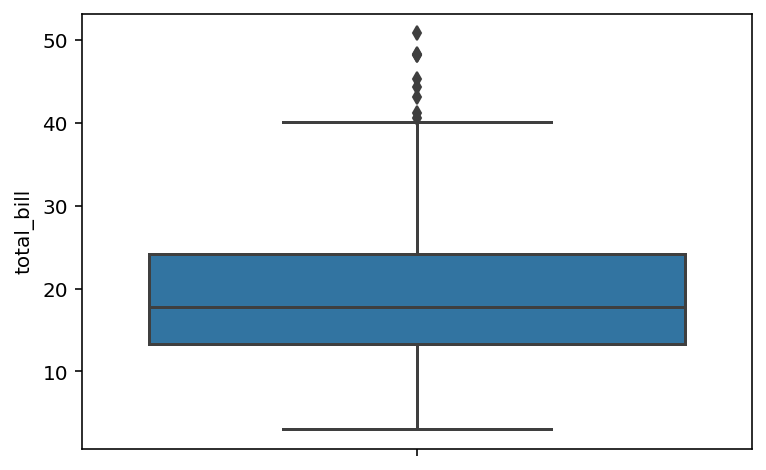

In [76]:
sns.boxplot(x=df['total_bill'],orient='v');

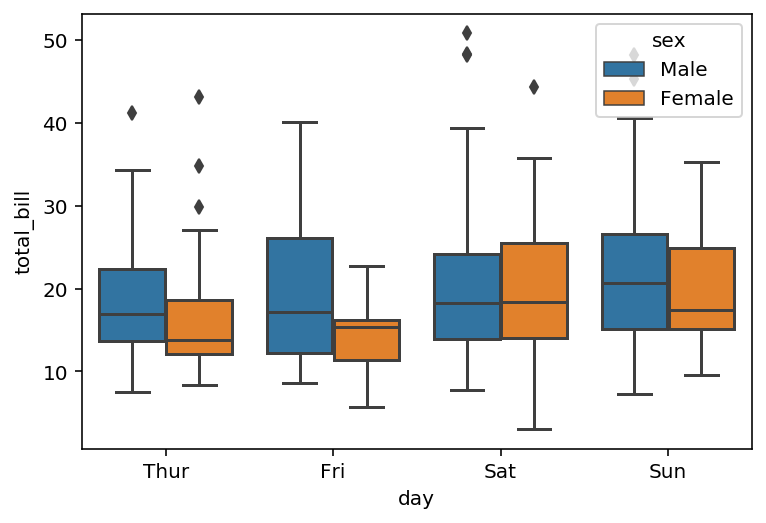

In [82]:
sns.boxplot(x='day',y='total_bill',hue='sex',data=df);

## Dağılım - Violin

In [83]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


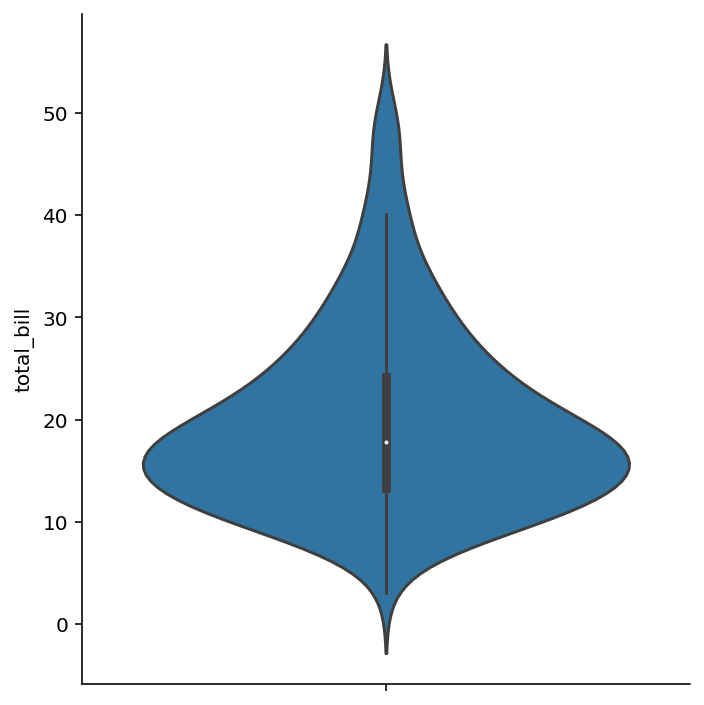

In [84]:
sns.catplot(y='total_bill',kind='violin',data=df);

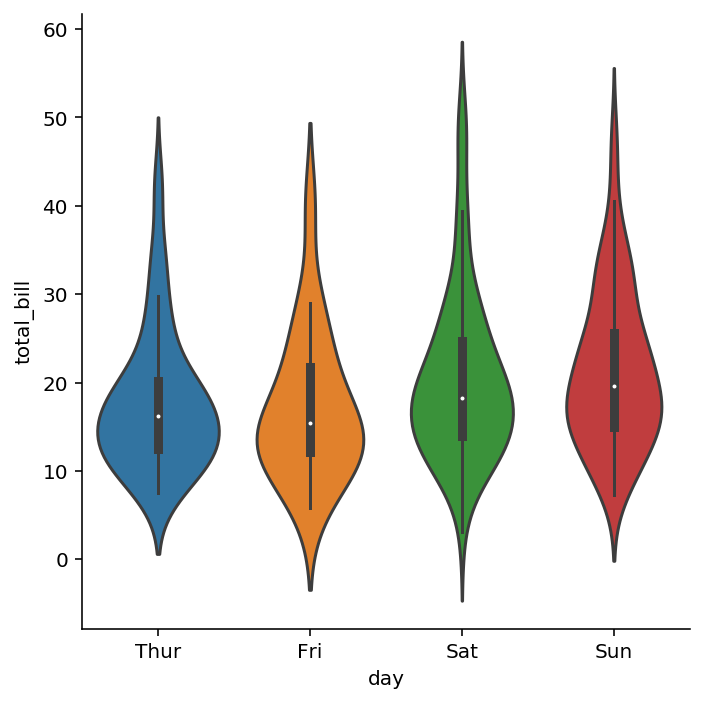

In [86]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'violin', data = df);

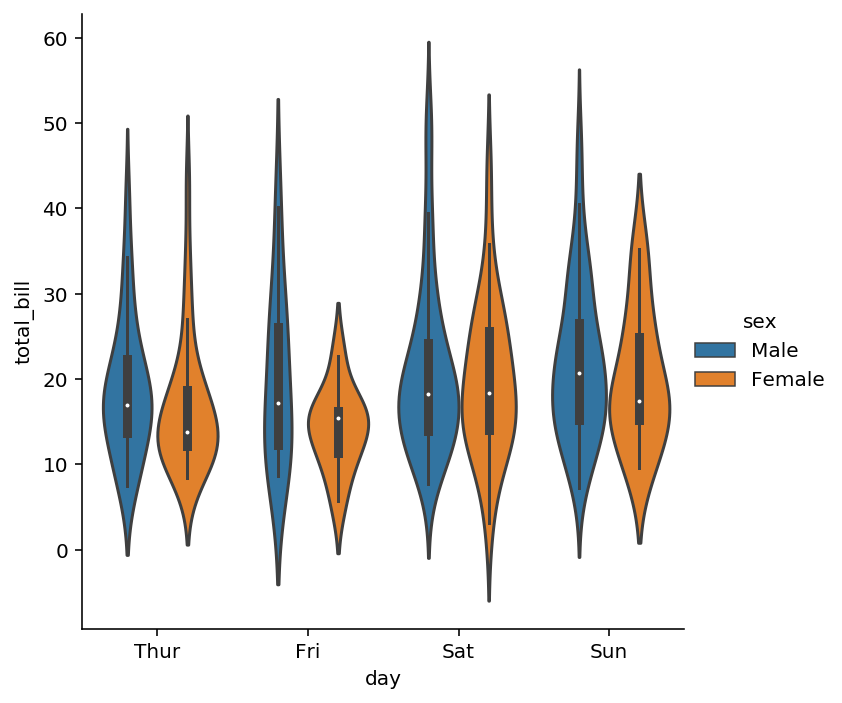

In [87]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'violin', hue = 'sex', data = df);

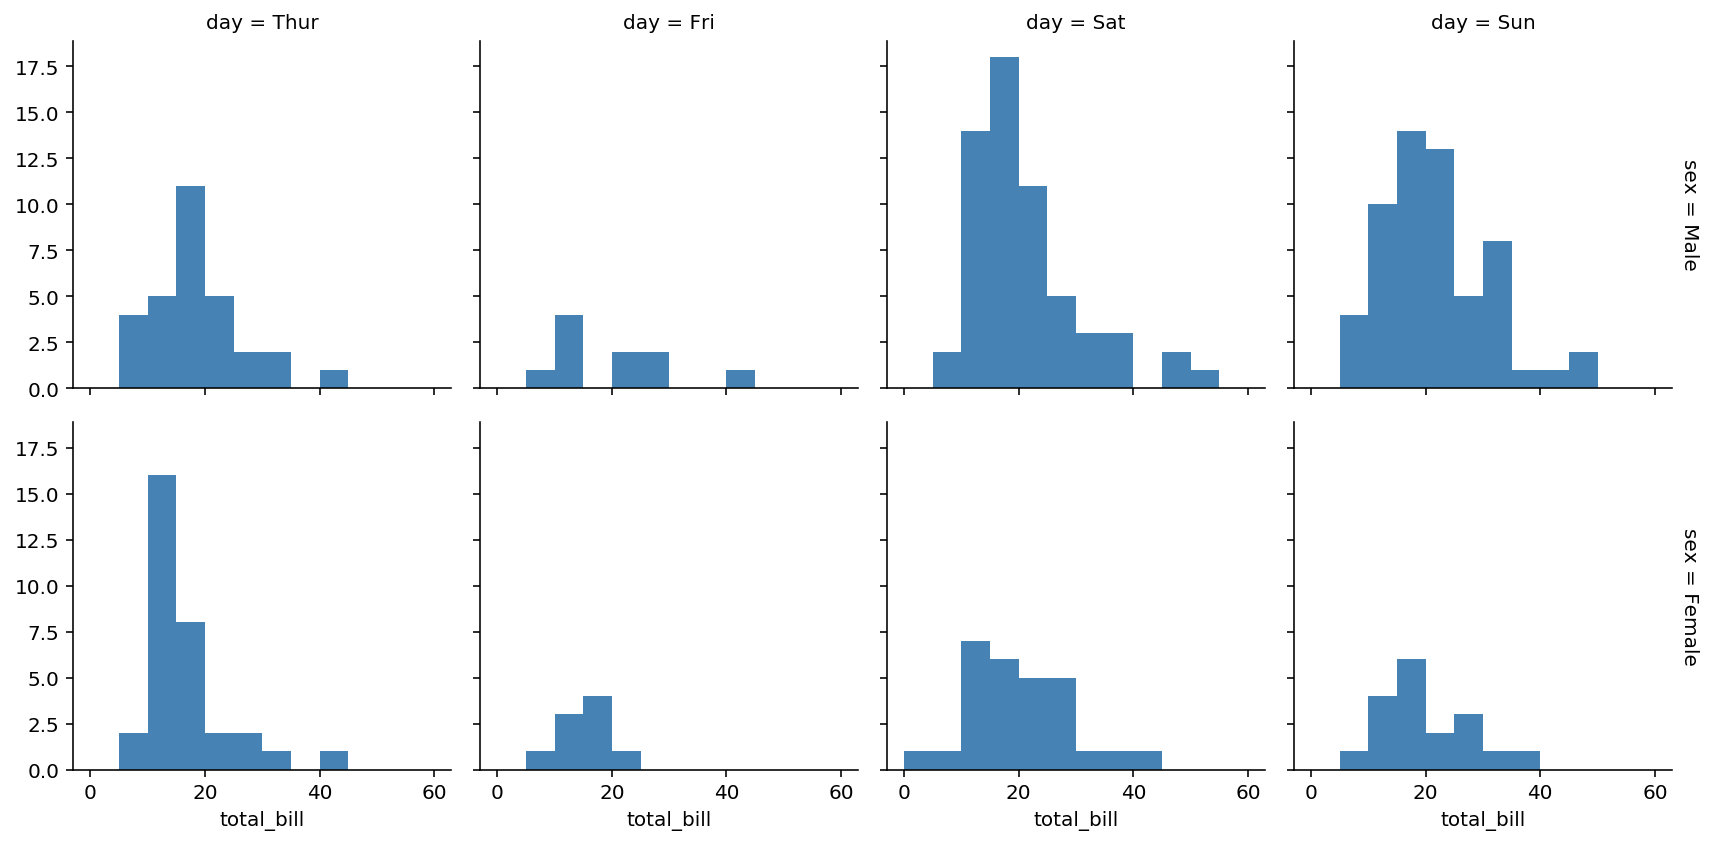

In [88]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, row = "sex", col = "day", margin_titles = True) 
#bolme işlemi

bins = np.linspace(0, 60, 13) #aralıklar


g.map(plt.hist, "total_bill", color="steelblue", bins=bins);

# Korelasyon - Basit Scatterplot

In [89]:
import seaborn as sns; 
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


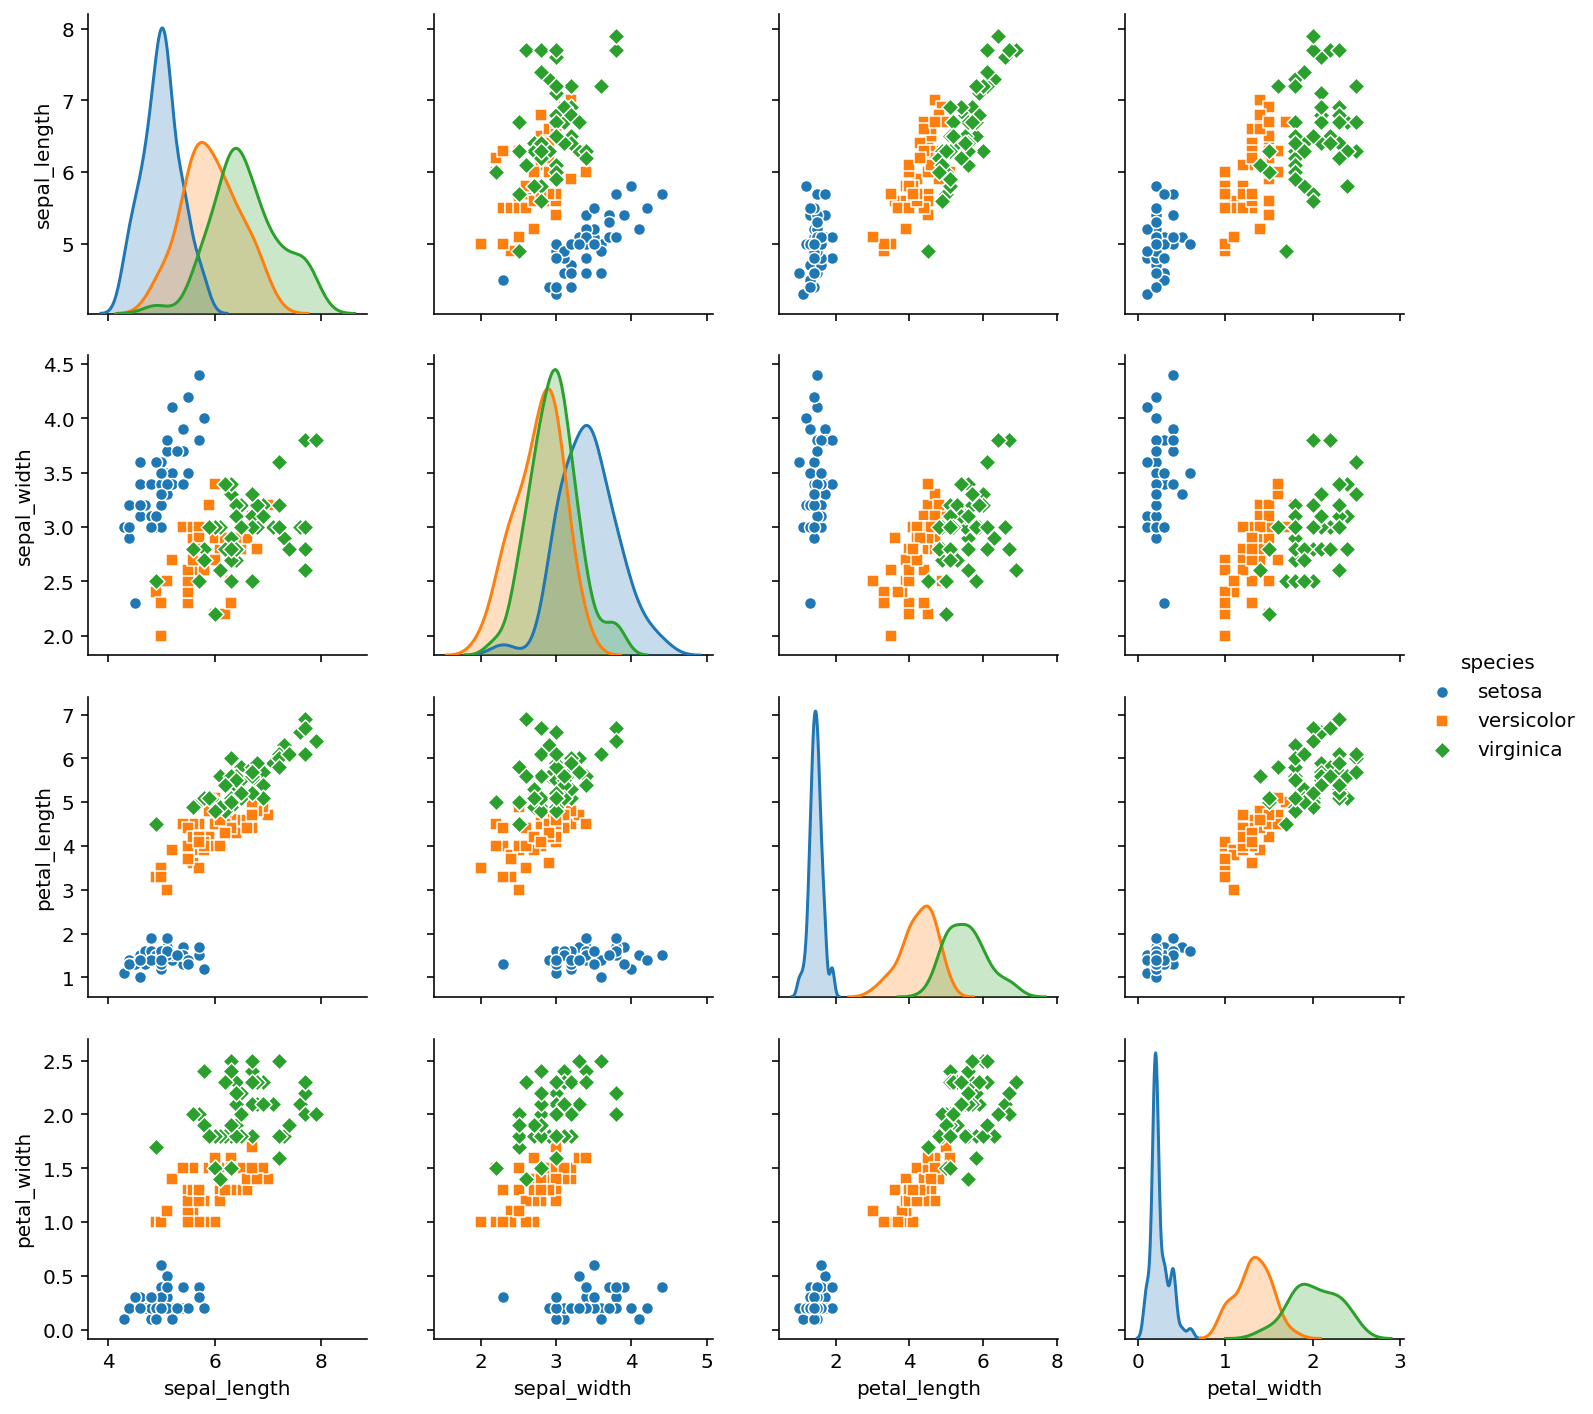

In [93]:
sns.pairplot(df,hue='species',markers=['o','s','D']);

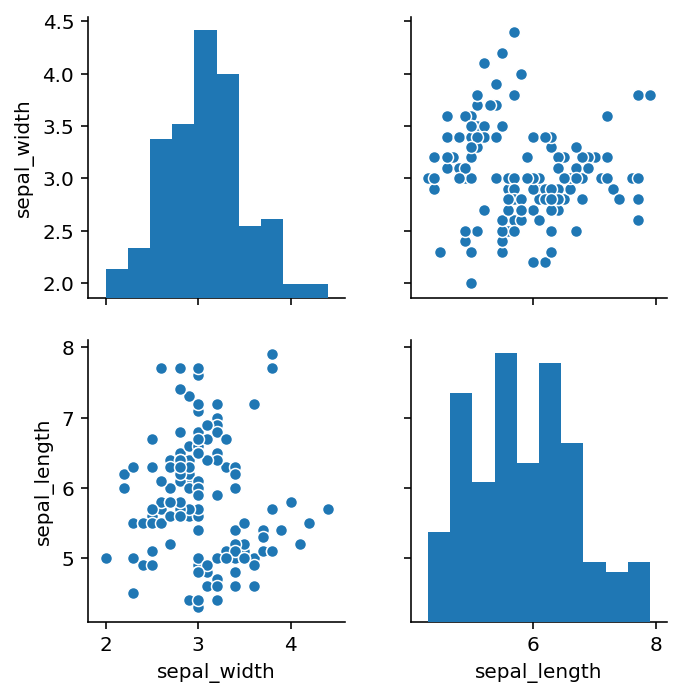

In [95]:
sns.pairplot(df, vars = ['sepal_width','sepal_length']);

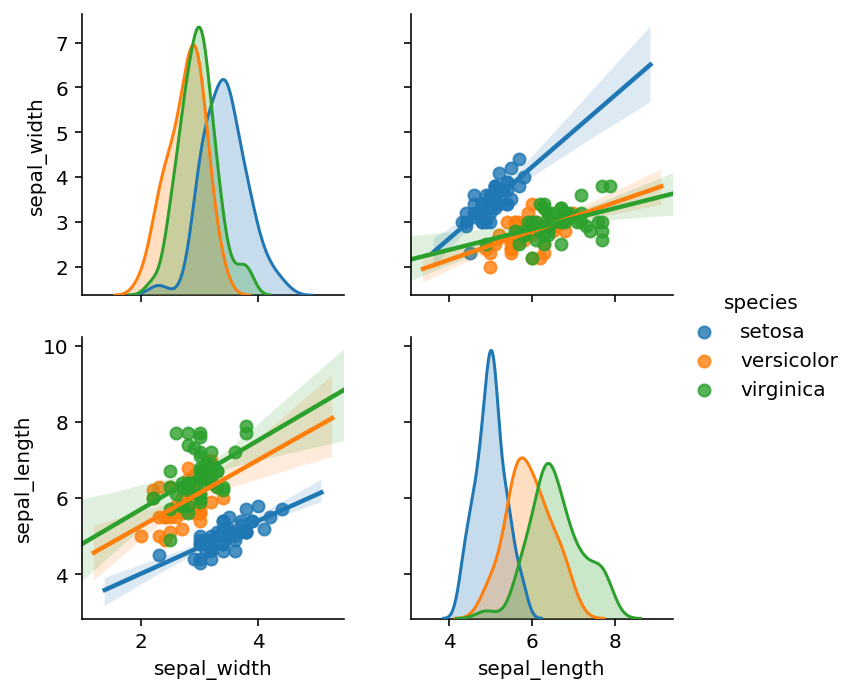

In [97]:
sns.pairplot(df,vars = ['sepal_width','sepal_length'],hue='species',kind='reg');

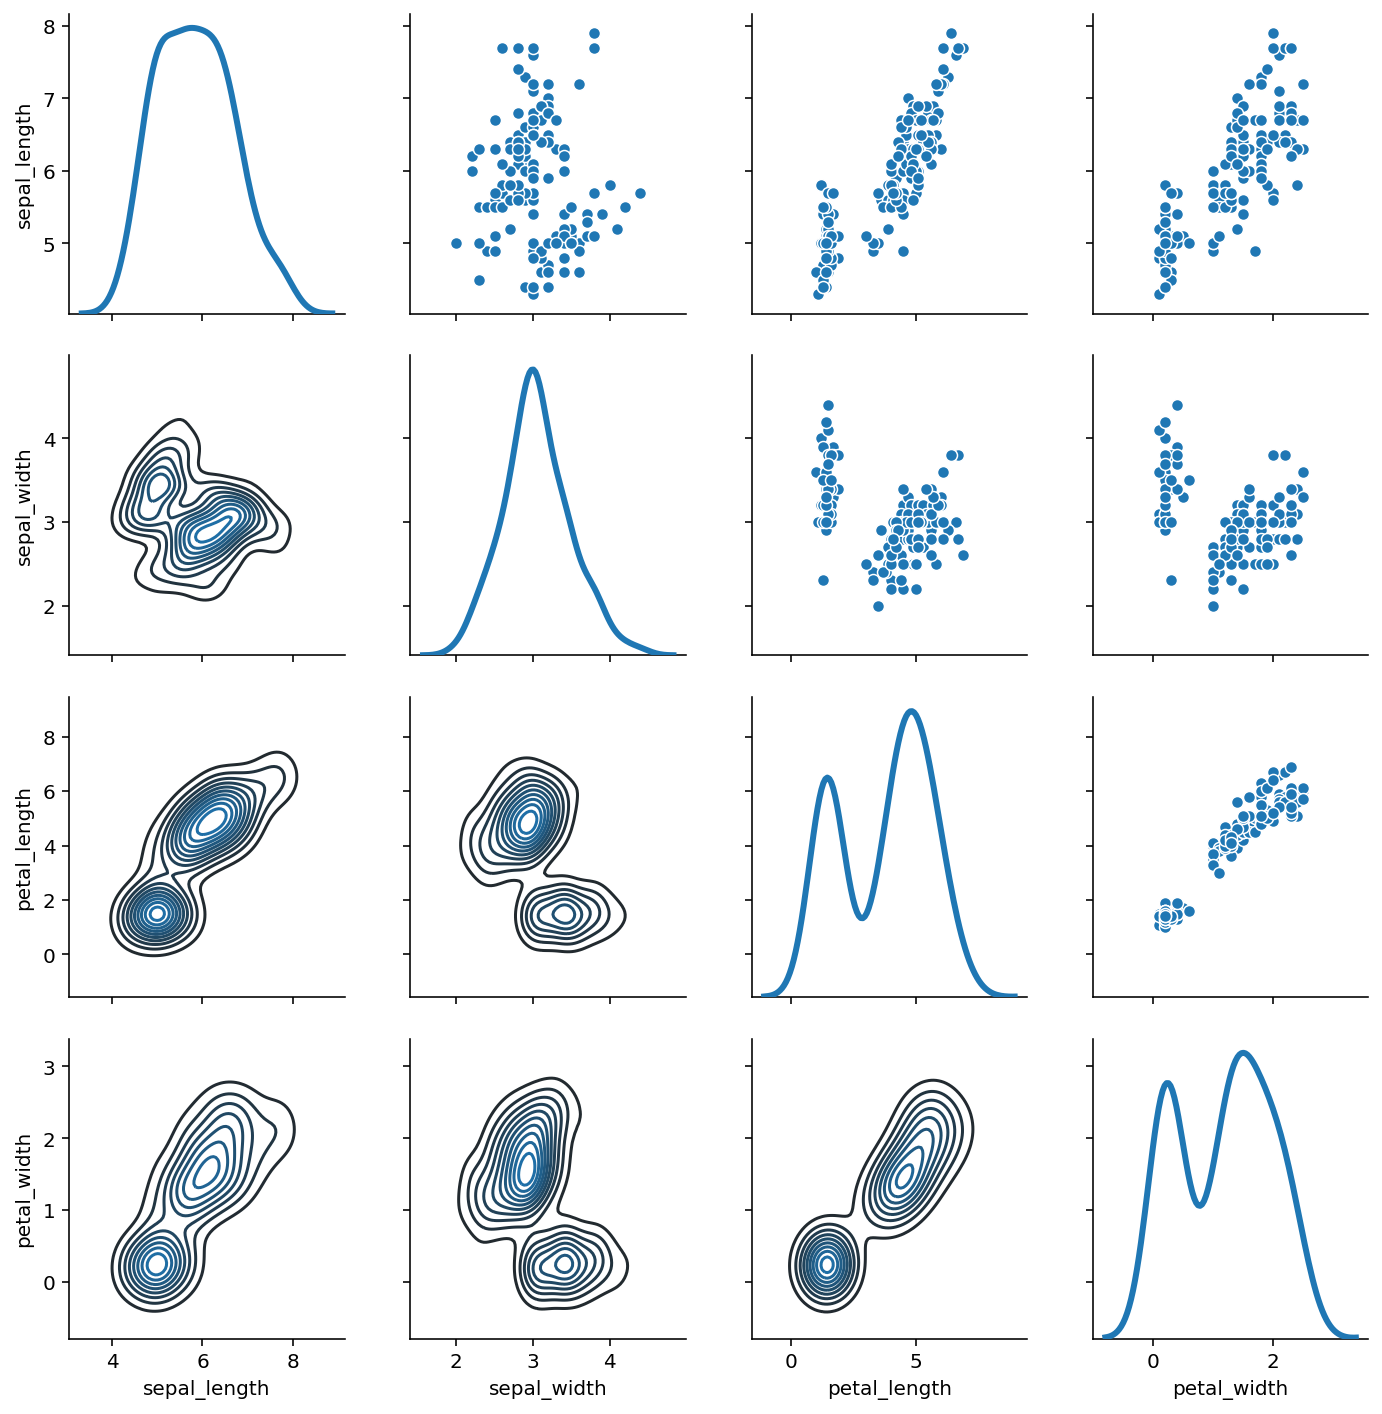

In [99]:
g = sns.PairGrid(df,diag_sharey = False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

## Korelasyon - Heatmap

In [100]:
import seaborn as sns
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [101]:
df.shape

(144, 3)

In [103]:
df = df.pivot('month','year','passengers')
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


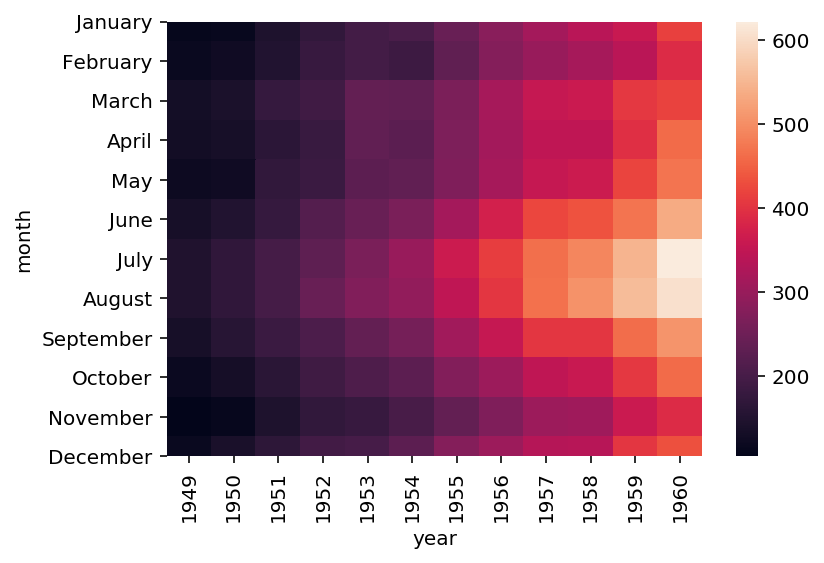

In [105]:
sns.heatmap(df);

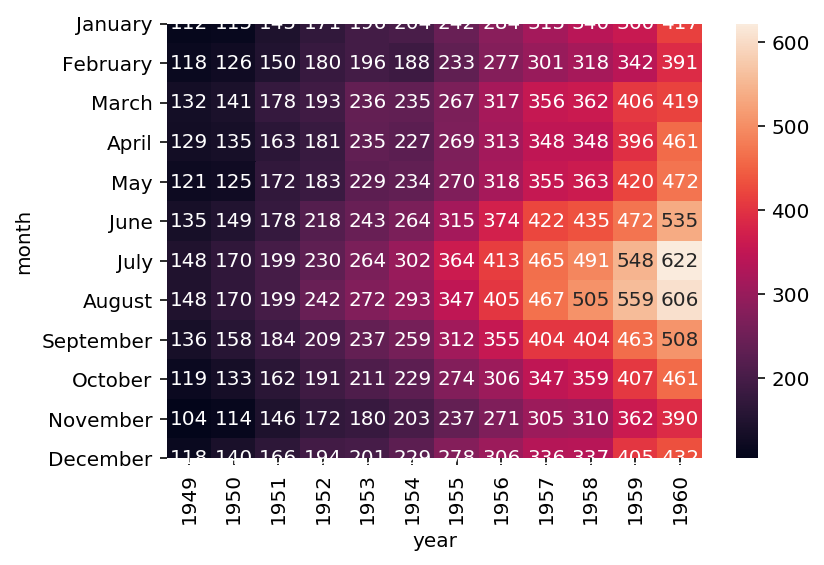

In [106]:
sns.heatmap(df,annot =True,fmt = 'd');

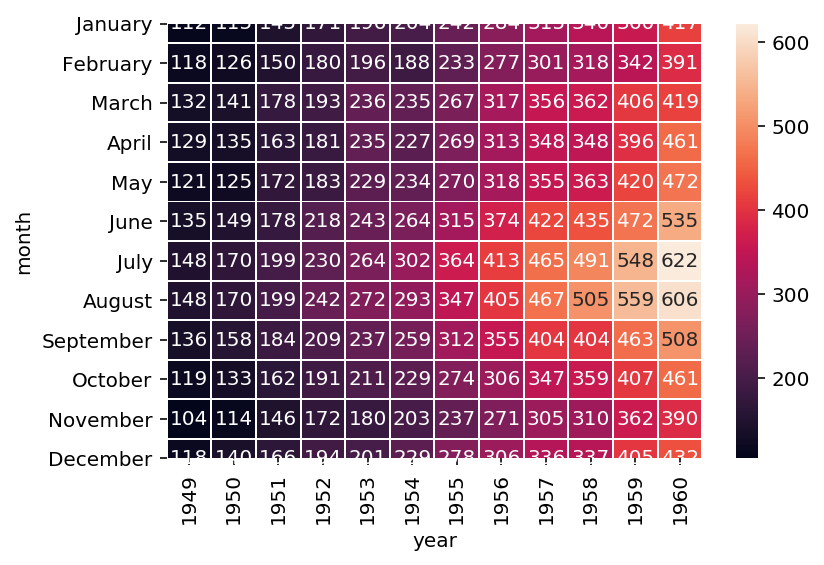

In [107]:
sns.heatmap(df,annot =True,fmt = 'd',linewidths =.5);

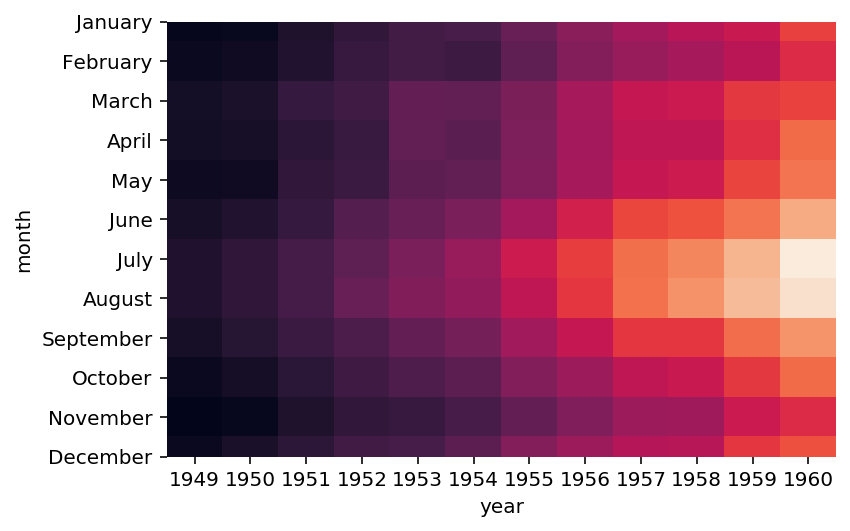

In [108]:
sns.heatmap(df,cbar= False);

### cıktı boyutu
* import seaborn as sns
* sns.set_context("poster")
* sns.set(rc={'figure.figsize': (5, 5)})
* sns.set_style("whitegrid")

# Çizgi Grafik

In [109]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [110]:
df.shape

(1064, 5)

In [111]:
df['timepoint'].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [112]:
df['signal'].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

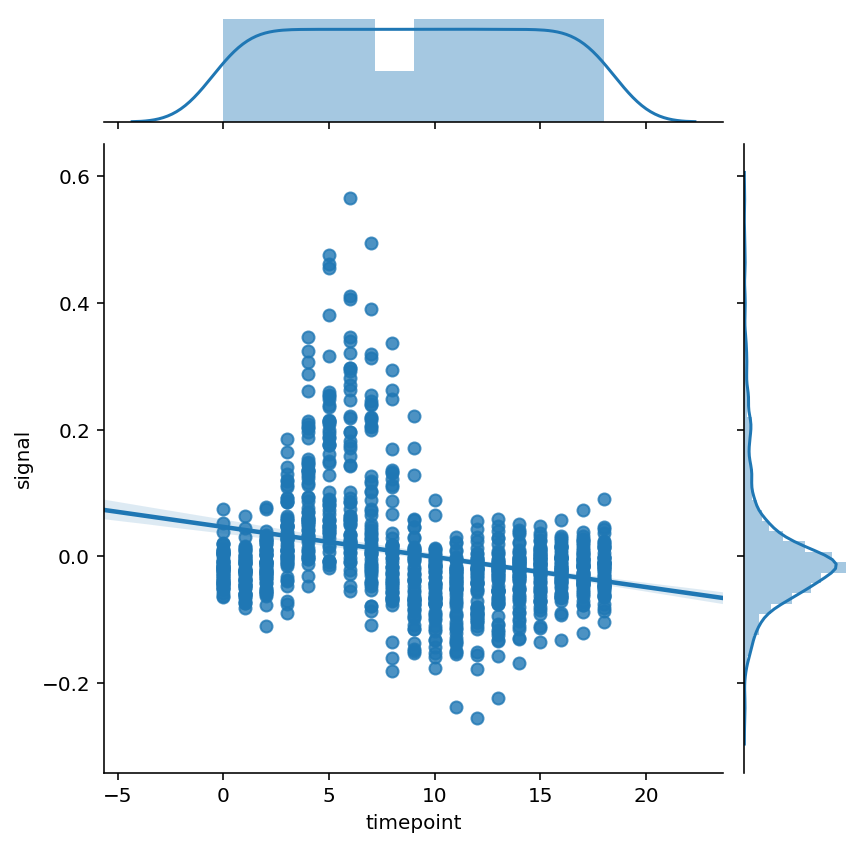

In [114]:
sns.jointplot(x='timepoint',y='signal',data=df,kind='reg');

In [115]:
df.groupby('timepoint')['signal'].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [118]:
df.groupby('timepoint')['signal'].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


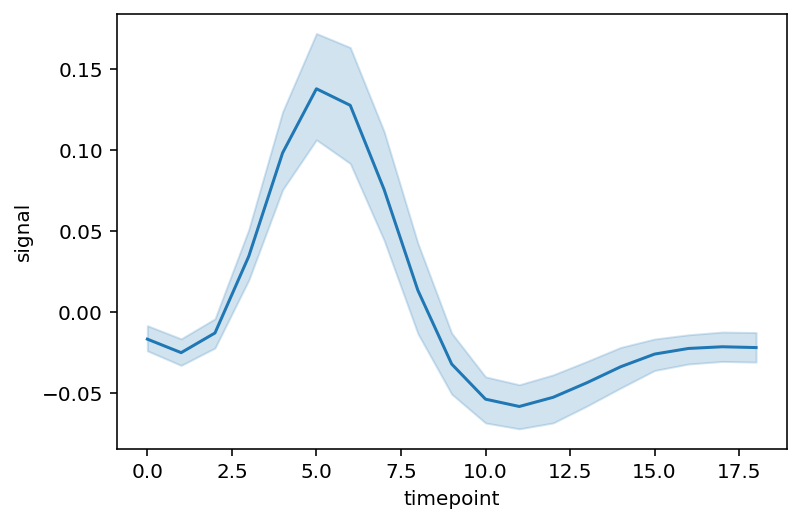

In [120]:
sns.lineplot(x='timepoint',y='signal',data=df);

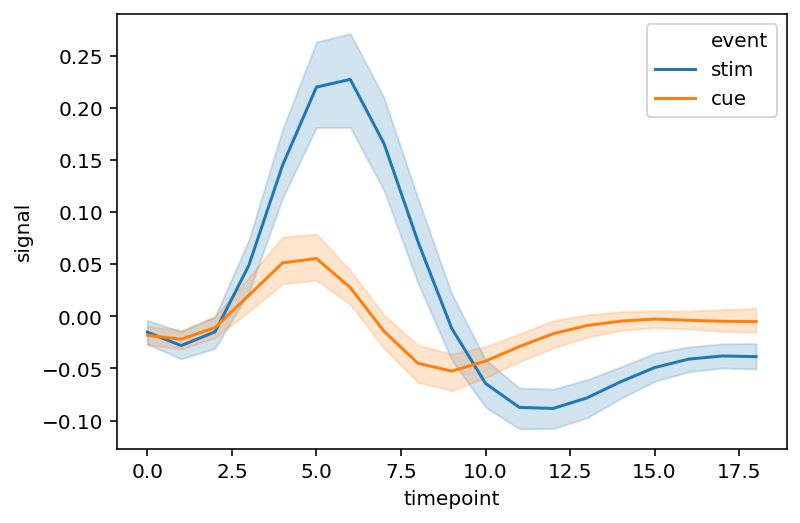

In [121]:
sns.lineplot(x='timepoint',y='signal',hue='event',data=df);

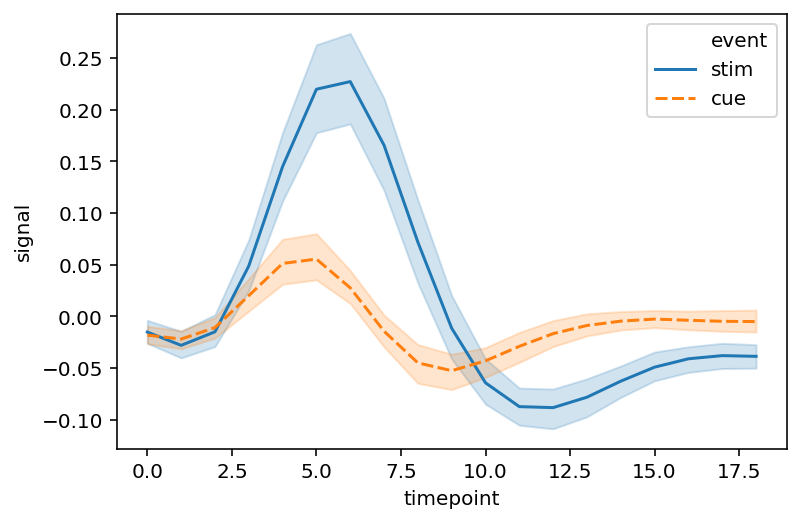

In [122]:
sns.lineplot(x='timepoint',y='signal',hue='event',style= 'event' ,data=df);

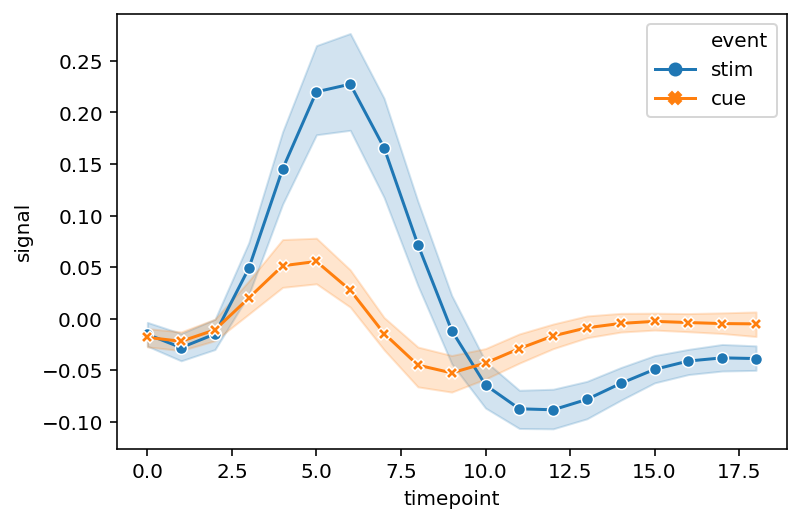

In [123]:
sns.lineplot(x='timepoint',y='signal',
             hue='event',style= 'event',
             markers=True, dashes=False,data=df);

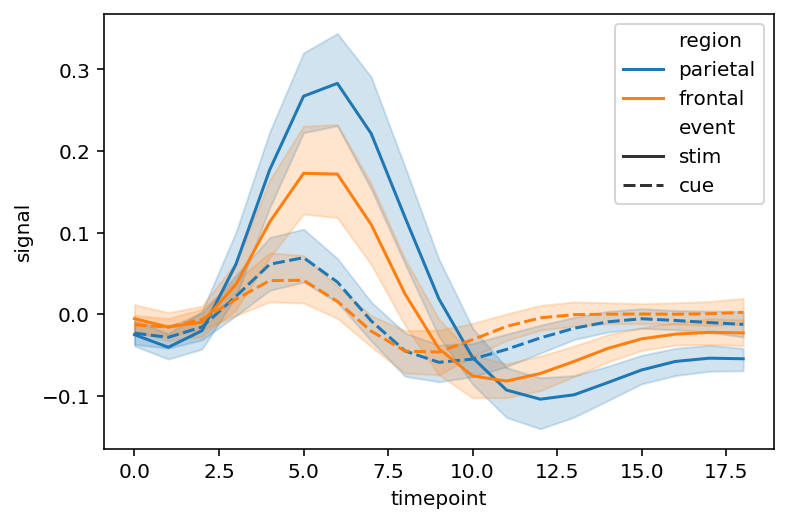

In [124]:
sns.lineplot(x='timepoint',y='signal',hue='region',style='event',data=df);

In [1]:
!pip install pandas-datareader